# Fake vs. Real Faces classification: a comparison between models


**Authors**

*   MUTHUGALA M.K.M - 2020e100
*   PRAMUDITHA R.M.H - 2020e114
*   SENARATHNE P.L.O.N - 2020e188

# Summary <a class="anchor" name="summary"></a>

* [Part 1: CNN](#part_01)
* [Part 2: VGG16](#part_02)


## CNN <a class="anchor" name="part_01"></a>

###Read Dataset from Github

In [1]:
!git clone https://github.com/hasithapramuditha/Real-FakeFace.git

Cloning into 'Real-FakeFace'...
remote: Enumerating objects: 2074, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2074 (delta 0), reused 1 (delta 0), pack-reused 2072
Receiving objects: 100% (2074/2074), 219.42 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Updating files: 100% (2044/2044), done.


###Import Required Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

###Load and Augment Data

In [3]:
import os
import random
import shutil

# Define the paths
dataset_path = "/content/Real-FakeFace/Real and Fake Face Detection Dataset"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

categories = ["Fake", "Real"]

# Create train, validation, and test directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Create subdirectories for each category in train, validation, and test directories
for category in categories:
    train_category_path = os.path.join(train_path, category)
    val_category_path = os.path.join(val_path, category)
    test_category_path = os.path.join(test_path, category)
    os.makedirs(train_category_path, exist_ok=True)
    os.makedirs(val_category_path, exist_ok=True)
    os.makedirs(test_category_path, exist_ok=True)

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Iterate through each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)

    # Shuffle the images
    random.shuffle(images)

    # Calculate the number of images for each set
    num_images = len(images)
    num_train_images = int(num_images * train_ratio)
    num_val_images = int(num_images * val_ratio)
    num_test_images = num_images - num_train_images - num_val_images

    # Split the images
    train_images = images[:num_train_images]
    val_images = images[num_train_images:num_train_images + num_val_images]
    test_images = images[num_train_images + num_val_images:]

    # Move train images to the train directory
    for img in train_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(train_path, category, img)
        shutil.move(src, dst)

    # Move validation images to the validation directory
    for img in val_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(val_path, category, img)
        shutil.move(src, dst)

    # Move test images to the test directory
    for img in test_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(test_path, category, img)
        shutil.move(src, dst)

# Remove the empty category directories
for category in categories:
    os.rmdir(os.path.join(dataset_path, category))


In [4]:
# Define paths
dataset_path = "/content/Real-FakeFace/Real and Fake Face Detection Dataset"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for validation and test
val_test_datagen = ImageDataGenerator(rescale=1. / 255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Flow validation images in batches using val_test_datagen generator
val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# Flow test images in batches using val_test_datagen generator
test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)


Found 1428 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


###Define and Compile the CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


###Train the Model

In [6]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)


Epoch 1/10
44/44 [==============================] - 31s 544ms/step - loss: 0.7588 - accuracy: 0.5312 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/10
44/44 [==============================] - 24s 540ms/step - loss: 0.6913 - accuracy: 0.5408 - val_loss: 0.6904 - val_accuracy: 0.5755
Epoch 3/10
44/44 [==============================] - 24s 539ms/step - loss: 0.6904 - accuracy: 0.5351 - val_loss: 0.6877 - val_accuracy: 0.5964
Epoch 4/10
44/44 [==============================] - 24s 558ms/step - loss: 0.6830 - accuracy: 0.5752 - val_loss: 0.7232 - val_accuracy: 0.5078
Epoch 5/10
44/44 [==============================] - 23s 524ms/step - loss: 0.6795 - accuracy: 0.5702 - val_loss: 0.6670 - val_accuracy: 0.6094
Epoch 6/10
44/44 [==============================] - 24s 554ms/step - loss: 0.6751 - accuracy: 0.5910 - val_loss: 0.6778 - val_accuracy: 0.5599
Epoch 7/10
44/44 [==============================] - 23s 517ms/step - loss: 0.6762 - accuracy: 0.5673 - val_loss: 0.6766 - val_accuracy: 0.5885

###Plot Accuracy and Loss Graphs

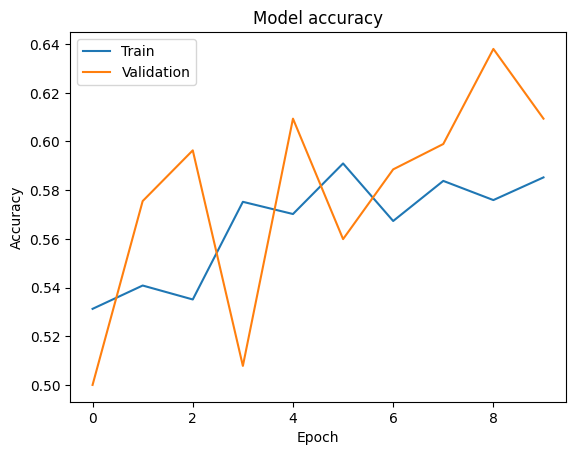

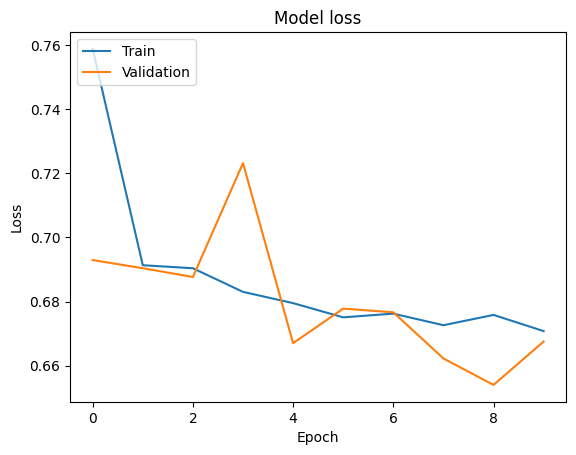

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Evaluate on Test Data and Plot Confusion Matrix

7/7 - 2s - loss: 0.6798 - accuracy: 0.5317 - 2s/epoch - 265ms/step
Test accuracy: 0.5317073464393616
7/7 [==============================] - 2s 219ms/step
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        96
           1       0.55      0.64      0.59       109

    accuracy                           0.53       205
   macro avg       0.53      0.52      0.52       205
weighted avg       0.53      0.53      0.53       205

Confusion Matrix:
[[39 57]
 [39 70]]


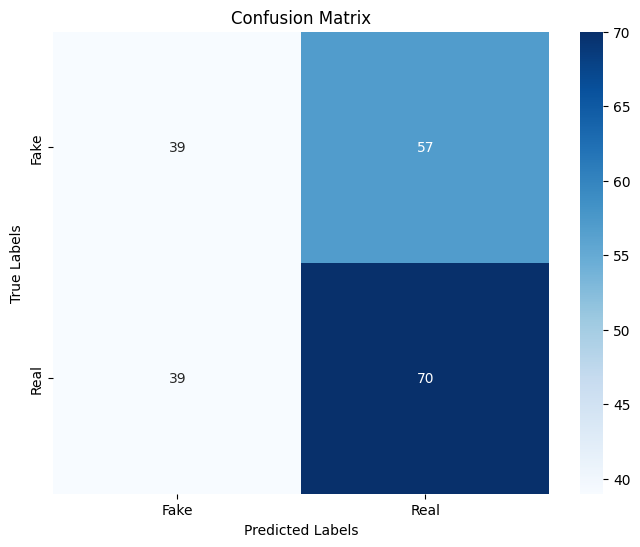

In [8]:
import seaborn as sns
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

# Predict classes for test data
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred)

# True classes for test data
y_true = test_generator.classes

# Generate classification report
print(classification_report(y_true, y_pred_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Define class labels
class_labels = ['Fake', 'Real']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



## VGG16 <a class="anchor" name="part_02"></a>

###Import Required Libraries

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

###Load and Augment Data

In [10]:
# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for validation and test
val_test_datagen = ImageDataGenerator(rescale=1. / 255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Flow validation images in batches using val_test_datagen generator
val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# Flow test images in batches using val_test_datagen generator
test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)


Found 1428 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


###Load VGG16 Model (Pre-trained)

In [11]:
# Load pre-trained VGG16 model without top layers (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


###Build and Compile the Model

In [12]:
# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


###Train the Model

In [13]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)


Epoch 1/10
44/44 [==============================] - 42s 786ms/step - loss: 1.1263 - accuracy: 0.5451 - val_loss: 0.6746 - val_accuracy: 0.5859
Epoch 2/10
44/44 [==============================] - 32s 721ms/step - loss: 0.6571 - accuracy: 0.5989 - val_loss: 0.6571 - val_accuracy: 0.5938
Epoch 3/10
44/44 [==============================] - 31s 701ms/step - loss: 0.6520 - accuracy: 0.6218 - val_loss: 0.6366 - val_accuracy: 0.6562
Epoch 4/10
44/44 [==============================] - 31s 699ms/step - loss: 0.6317 - accuracy: 0.6332 - val_loss: 0.6324 - val_accuracy: 0.6510
Epoch 5/10
44/44 [==============================] - 31s 706ms/step - loss: 0.6239 - accuracy: 0.6626 - val_loss: 0.7146 - val_accuracy: 0.5677
Epoch 6/10
44/44 [==============================] - 33s 744ms/step - loss: 0.6132 - accuracy: 0.6590 - val_loss: 0.6184 - val_accuracy: 0.6615
Epoch 7/10
44/44 [==============================] - 32s 736ms/step - loss: 0.6016 - accuracy: 0.6683 - val_loss: 0.6320 - val_accuracy: 0.6536

###Evaluate on Test Data and Plot Confusion Matrix

7/7 - 6s - loss: 0.6244 - accuracy: 0.6488 - 6s/epoch - 814ms/step
Test accuracy: 0.6487804651260376
7/7 [==============================] - 2s 259ms/step
              precision    recall  f1-score   support

           0       0.60      0.77      0.67        96
           1       0.73      0.54      0.62       109

    accuracy                           0.65       205
   macro avg       0.66      0.66      0.65       205
weighted avg       0.67      0.65      0.65       205

Confusion Matrix:
[[74 22]
 [50 59]]


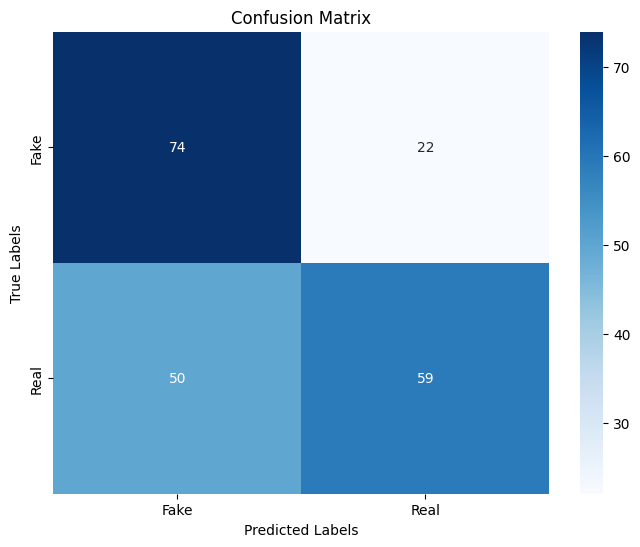

In [14]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

# Predict classes for test data
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred)

# True classes for test data
y_true = test_generator.classes

# Generate classification report
print(classification_report(y_true, y_pred_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix with labels
class_labels = ['Fake', 'Real']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
